# Introdução
Objetivo: Desenvolver um Perceptron utilizando Keras em Python e explicar detalhadamente cada parte do código desenvolvido. O Perceptron é um modelo de rede neural simples, mas fundamental, que serve como base para o entendimento de modelos de aprendizado mais complexos.

Links de apoio:
- [Repositório do Github](https://github.com/VitorMoura01/Classificacao-Fraudes-Cartao)
- [Dataset Kaggle](https://www.kaggle.com/datasets/yashpaloswal/fraud-detection-credit-card/data)

*Vitor Moura - T4G1*

# Preparação do ambiente 🏡

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 6.0 MB/s eta 0:00:00


In [44]:
import pandas as pd
import dask.dataframe as dd
from dask import delayed, compute
import zipfile
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow.keras.layers import Input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Precision, Recall
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

In [7]:
# df = pd.read_csv('/content/drive/MyDrive/M11/creditcard.csv')

# Análise exploratória 🔍

In [15]:
dtypes_dict = {
    'Time': 'float64',
    'V1': 'float64',
    'V2': 'float64',
    'V3': 'float64',
    'V4': 'float64',
    'V5': 'float64',
    'V6': 'float64',
    'V7': 'float64',
    'V8': 'float64',
    'V9': 'float64',
    'V10': 'float64',
    'V11': 'float64',
    'V12': 'float64',
    'V13': 'float64',
    'V14': 'float64',
    'V15': 'float64',
    'V16': 'float64',
    'V17': 'float64',
    'V18': 'float64',
    'V19': 'float64',
    'V20': 'float64',
    'V21': 'float64',
    'V22': 'float64',
    'V23': 'float64',
    'V24': 'float64',
    'V25': 'float64',
    'V26': 'float64',
    'V27': 'float64',
    'V28': 'float64',
    'Amount': 'float64',
    'Class': 'float64'
}

In [39]:
df = dd.read_csv('/content/drive/MyDrive/M11/creditcard.csv', dtype=dtypes_dict)

In [24]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'class'],
      dtype='object')

In [21]:
df['class'].value_counts().compute()

,count
class,
0,284315
1,492


<Axes: xlabel='class'>

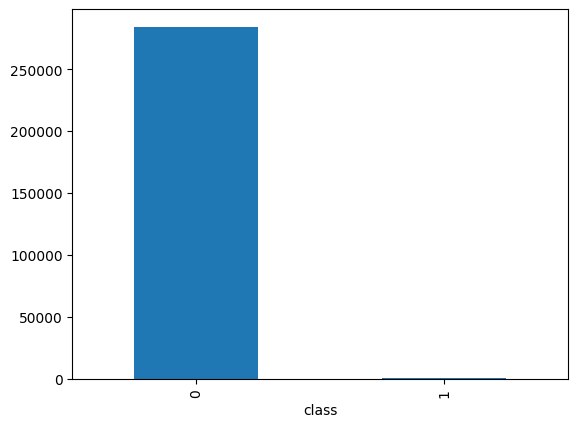

In [26]:
df['class'].value_counts().compute().plot(kind='bar')

Os dados estão desequilibrados, pois as classificações fraudulentas representam apenas 0,1%, então mesmo que o modelo classifique todas os registros como não fraudulentas, obteriamos uma acurácia de 99%. Para corrigir isso podemos usar uma métrica como recall

In [22]:
print(df.isnull().sum().compute())
print(df.describe().compute())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027

In [42]:
df_boxplot = df[['class', 'Amount', 'Time', 'V1']]
df_boxplot.head()

,class,Amount,Time,V1
0,0,149.62,0.0,-1.359807
1,0,2.69,0.0,1.191857
2,0,378.66,1.0,-1.358354
3,0,123.50,1.0,-0.966272
4,0,69.99,2.0,-1.158233


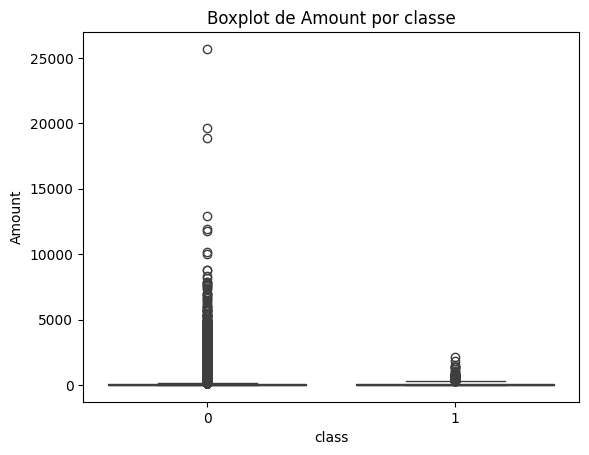

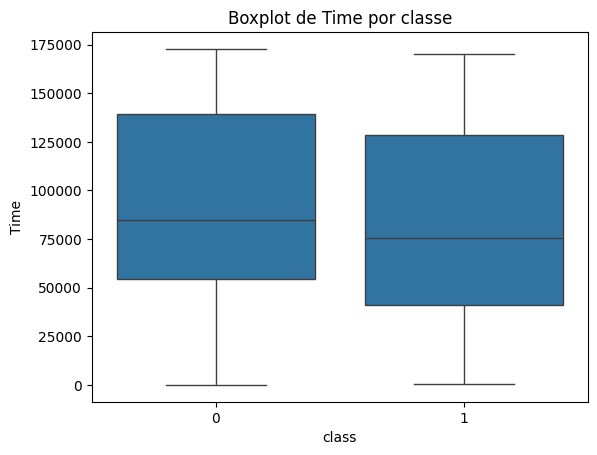

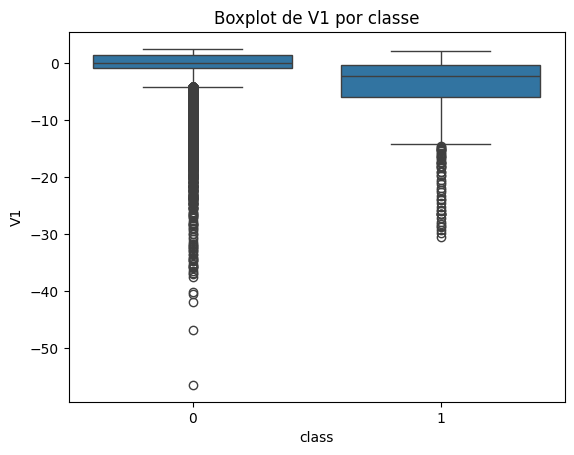

In [43]:
for column in df_boxplot.columns:
  if column != 'class':
    plt.figure()
    sns.boxplot(x='class', y=column, data=df_boxplot.compute())
    plt.title(f'Boxplot de {column} por classe')

# Treinamento do modelo 🧠

## Enunciado
Desenvolva um modelo sequencial em Keras com uma única camada Dense, utilizando uma unidade com a função de ativação sigmoid. Compile o modelo utilizando o otimizador adam, a função de perda binary_crossentropy, e a métrica accuracy. Inclua também a métrica F1 para uma avaliação mais completa, e explique brevemente a função de cada um desses componentes no treinamento. Treine o modelo por 50 épocas com um batch size de 10.

- Otimizador adam: Um algoritmo de otimização baseado em gradiente que ajusta os pesos do modelo para minimizar a função de perda.
- binary_crossentropy: Calcula o erro entre as previsões do modelo e os rótulos verdadeiros em problemas de classificação binária.
- accuracy: Mede a porcentagem de previsões corretas feitas pelo modelo.
- Precision: Mede a proporção de verdadeiros positivos entre as amostras classificadas como positivas.
- Recall: Mede a proporção de verdadeiros positivos que foram corretamente identificados pelo modelo.

Nessa parte do código o modelo é 'compilado', o que significa a definição de sua arquitetura

In [48]:
model = Sequential([
    Dense(1, activation='sigmoid', input_dim=30),
])
metrics = ['accuracy', Precision(), Recall()]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=metrics)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Nessa parte do código o dataset é dividido em treino (x_train, y_train) e teste.

In [49]:
X_train = df.drop('class', axis=1).compute()
y_train = df['class'].compute()

model.fit(X_train, y_train, epochs=50, batch_size=10)

y_pred = model.predict(X_train)
y_pred = (y_pred > 0.5).astype(int)

Epoch 1/50
28481/28481 ━━━━━━━━━━━━━━━━━━━━ 50s 2ms/step - accuracy: 0.9963 - loss: 5.9614 - precision_1: 0.0478 - recall_1: 0.0682
Epoch 2/50
28481/28481 ━━━━━━━━━━━━━━━━━━━━ 81s 2ms/step - accuracy: 0.9967 - loss: 0.9510 - precision_1: 0.1620 - recall_1: 0.2377
Epoch 3/50
28481/28481 ━━━━━━━━━━━━━━━━━━━━ 102s 2ms/step - accuracy: 0.9966 - loss: 0.9302 - precision_1: 0.2109 - recall_1: 0.3348
Epoch 4/50
28481/28481 ━━━━━━━━━━━━━━━━━━━━ 94s 3ms/step - accuracy: 0.9973 - loss: 0.8936 - precision_1: 0.2648 - recall_1: 0.4108
Epoch 5/50
28481/28481 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.9972 - loss: 0.8913 - precision_1: 0.2934 - recall_1: 0.4265
Epoch 6/50
28481/28481 ━━━━━━━━━━━━━━━━━━━━ 61s 2ms/step - accuracy: 0.9972 - loss: 0.8119 - precision_1: 0.3190 - recall_1: 0.4549
Epoch 7/50
28481/28481 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - accuracy: 0.9973 - loss: 0.9004 - precision_1: 0.2914 - recall_1: 0.3980
Epoch 8/50
28481/28481 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - accuracy: 0.9976

# Avaliação do modelo 🧾

## Enunciado
 Após o treinamento, utilize o modelo para prever os rótulos do conjunto de teste e calcule tanto a acurácia quanto a métrica F1. Interprete os resultados, discutindo o desempenho do modelo e possíveis melhorias.

In [ ]:
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print("Acurácia:", accuracy)
print("F1 Score:", f1)

Acurácia: 0.9988097202667069
F1 Score: 0.6062717770034843

Uma acurácia boa pode ser enganosa por conta do desbalanceamento dos dados. O F1 Score, por outro lado, fornece uma medida mais verdadeira do desempenho do modelo, considerando tanto a precisão quanto o recall.

## Possíveis melhorias
- Reamostragem para lidar com o desbalanceamento dos dados (oversampling ou undersampling).
- Experimentar outras arquiteturas de rede neural, como + camadas ocultas e variando o número de neurônios.
- Ajustar os hiperparâmetros do modelo, como a taxa de aprendizado e o número de épocas.